In [2]:
# import requirements.txt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load dataset
df = pd.read_csv("churndata.csv")

# Drop customerID since it's just an identifier
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, set errors='coerce' to handle non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [4]:
# Binary encoding for straightforward Yes/No features
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Encode internet-related features, assigning 2 to "No internet service"
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

# Show the first few rows to confirm the changes
df.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21940\1213542976.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21940\1213542976.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21940\1213542976.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
# Convert internet service-related features to integer type
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['TechSupport'] = df['TechSupport'].astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)

# Clean and convert TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', None).astype(float)

# Ensure numerical features are in the correct format
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as ohe

imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

ohe = ohe()
df['PaymentMethod'] = ohe.fit_transform(df[['PaymentMethod']]).toarray()
df['Contract'] = ohe.fit_transform(df[['Contract']]).toarray()
df['InternetService'] = ohe.fit_transform(df[['InternetService']]).toarray()
df['MultipleLines'] = ohe.fit_transform(df[['MultipleLines']]).toarray()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate classes
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]

# Balance class 0 to have the same size as class 1
class_0_balanced = class_0.sample(n=len(class_1), random_state=42)

# Combine balanced classes
df = pd.concat([class_0_balanced, class_1])

# Shuffle the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train/test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


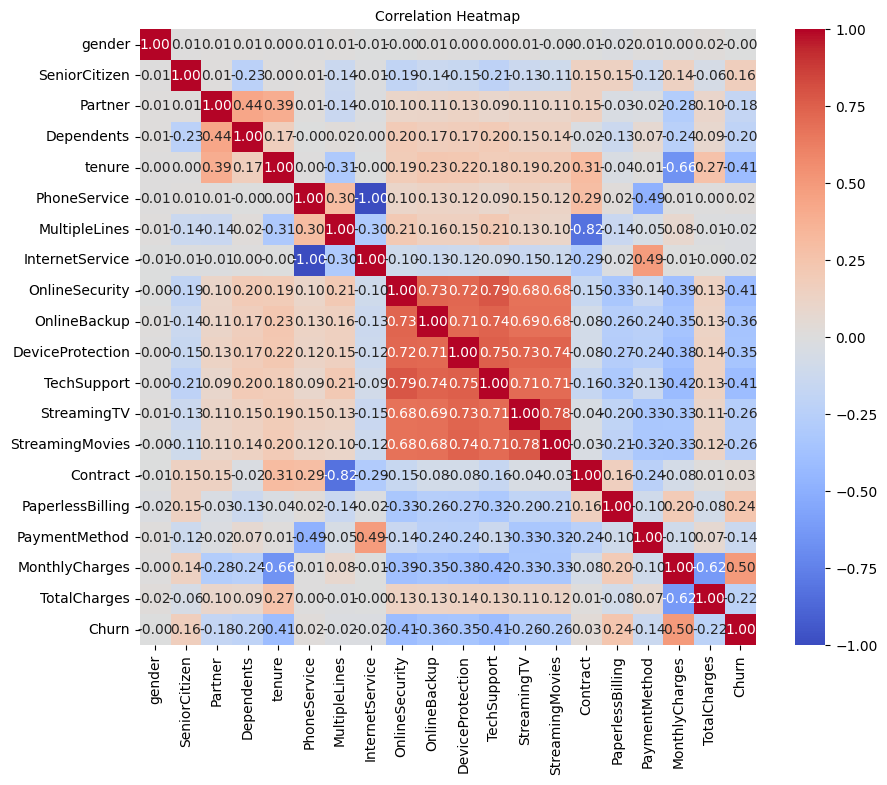

In [8]:
corr_matrix = df.corr()  # Compute correlation matrix

plt.figure(figsize=(10, 8))  # Set figure size

# Plot heatmap with annotations and color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap", fontsize=10)  # Add title

plt.show()  # Display the plot


In [9]:
from sklearn.preprocessing import RobustScaler as rb
from sklearn.decomposition import PCA

# Scale train and test data separately
scaler = rb()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Save train and test sets to CSV files (without indices)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.to_csv("X_train.csv", index=False)  # Features train set
X_test.to_csv("X_test.csv", index=False)    # Features test set
y_train.to_csv("y_train.csv", index=False)  # Target train set
y_test.to_csv("y_test.csv", index=False)    # Target test set